# # FASHION MNIST CLASSIFICATION USING KERAS

In [1]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
ans1=class_names[y_train_full[45]]
ans1

'Pullover'

In [7]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7062 - accuracy: 0.7699 - val_loss: 0.5153 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4885 - accuracy: 0.8314 - val_loss: 0.4406 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4428 - accuracy: 0.8438 - val_loss: 0.4241 - val_accuracy: 0.8552
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4143 - accuracy: 0.8558 - val_loss: 0.3938 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3952 - accuracy: 0.8609 - val_loss: 0.4167 - val_accuracy: 0.8572
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3797 - accuracy: 0.8660 - val_loss: 0.3726 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8702 - val_loss: 0.3730 - val_accuracy:

In [11]:
hist=pd.DataFrame(history.history)

In [12]:
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.706194,0.769855,0.515311,0.8236
1,0.488549,0.831364,0.440636,0.8506
2,0.442826,0.843800,0.424128,0.8552
3,0.414283,0.855836,0.393772,0.8662
4,0.395167,0.860945,0.416663,0.8572


<AxesSubplot:>

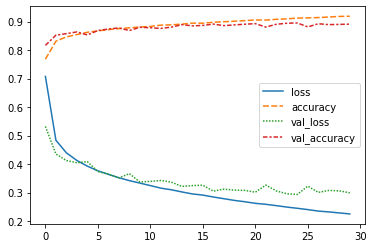

In [35]:
sns.lineplot(data=hist)


In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.7774 - accuracy: 0.8466


[64.77742004394531, 0.8465999960899353]